In [17]:
import pandas as pd
from pycaret.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

df = pd.read_csv("final.csv")

cols_to_keep = ['jacket_number', 'age_at_arrest', 'hours', 'marital_status', 'employment_status',
    'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type', 'r', 'days_since', 'offense_level', 'previous_i', 'age_first', 'year']
categorical =  ['marital_status', 'employment_status', 'race', 'city', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type', 'offense_level', 'year']

predict_columns = ['age_at_arrest', 'age_at_release', 'hours', 'marital_status', 'employment_status',
    'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type']

new_df = df.loc[:, cols_to_keep]
new_df


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,occupation,school,prisoner_type,r,days_since,offense_level,previous_i,age_first,year
0,6265,72.0,14,Single,Retired,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,UNEMPLOYED,High School,Misdemeanor Arraignment,False,NaN,Misdemeanor,0,72.0,2013
1,6565,68.0,40,Single,Self Employed,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,Misdemeanor Arraignment,True,NaN,Misdemeanor,0,68.0,2012
2,6565,69.0,11,Single,Retired,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,521.0,Other,1,68.0,2013
3,6565,70.0,16,Single,Unemployed,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,316.0,Other,2,68.0,2014
4,6565,71.0,3,Single,Employed - Full Time,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,209.0,Other,3,68.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40252,1069761,54.0,0,Divorced,Unemployed,DANVILLE,Black,Male,ILLINOIS,UNITED STATES,SALES,High School,Felony Other,False,NaN,Felony,0,54.0,2018
40253,1069763,18.0,0,Single,Unemployed,RANTOUL,Black,Female,ILLINOIS,UNITED STATES,FACTORY WORKER,High School,Misdemeanor Other,False,NaN,Misdemeanor,0,18.0,2018
40254,1069766,32.0,115,Married,Employed - Full Time,RANTOUL,Black,Female,ILLINOIS,UNITED STATES,FACTORY WORKER,High School,Misdemeanor Arraignment,False,NaN,Misdemeanor,0,32.0,2018
40255,1069768,31.0,9,Married,Employed - Full Time,CHICAGO,Black,Male,ILLINOIS,BRAZIL,STUDENT,High School,Misdemeanor Pre-Trial,False,NaN,Misdemeanor,0,31.0,2018


In [18]:
s = setup(new_df, target='r', categorical_features=categorical)

,Description,Value
0,Session id,427
1,Target,r
2,Target type,Binary
3,Original data shape,"(40257, 19)"
4,Transformed data shape,"(40257, 44)"
5,Transformed train set shape,"(28179, 44)"
6,Transformed test set shape,"(12078, 44)"
7,Numeric features,6
8,Categorical features,12
9,Rows with missing values,48.7%


In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7191,0.0000,0.7375,0.7212,0.7292,0.4374,0.4376,0.5890
gbc,Gradient Boosting Classifier,0.7147,0.0000,0.7435,0.7128,0.7278,0.4284,0.4288,0.4100
rf,Random Forest Classifier,0.7082,0.0000,0.7243,0.7120,0.7181,0.4158,0.4159,0.2840
ada,Ada Boost Classifier,0.7042,0.0000,0.7362,0.7018,0.7186,0.4073,0.4078,0.1340
ridge,Ridge Classifier,0.6938,0.0000,0.7489,0.6841,0.7150,0.3857,0.3875,0.0430
lda,Linear Discriminant Analysis,0.6937,0.0000,0.7489,0.6840,0.7149,0.3854,0.3873,0.0520
et,Extra Trees Classifier,0.6833,0.0000,0.7044,0.6866,0.6953,0.3658,0.3660,0.2730
lr,Logistic Regression,0.6788,0.0000,0.7287,0.6725,0.6994,0.3557,0.3571,0.2250
dt,Decision Tree Classifier,0.6251,0.0000,0.6360,0.6345,0.6351,0.2497,0.2498,0.0610
knn,K Neighbors Classifier,0.5974,0.0000,0.6258,0.6038,0.6146,0.1934,0.1935,0.0760


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=427, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [20]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7179,0.0000,0.7377,0.7193,0.7284,0.4350,0.4352
1,0.7186,0.0000,0.7502,0.7150,0.7322,0.4361,0.4367
2,0.7165,0.0000,0.7502,0.7122,0.7307,0.4318,0.4324
3,0.7094,0.0000,0.7439,0.7054,0.7241,0.4175,0.4182
4,0.7221,0.0000,0.7490,0.7206,0.7345,0.4433,0.4437
5,0.7147,0.0000,0.7448,0.7123,0.7282,0.4283,0.4288
6,0.7087,0.0000,0.7351,0.7082,0.7214,0.4163,0.4166
7,0.7243,0.0000,0.7573,0.7199,0.7381,0.4474,0.4480
8,0.7126,0.0000,0.7331,0.7143,0.7235,0.4243,0.4245


In [21]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7140,0.0000,0.7218,0.7208,0.7213,0.4276,0.4276
1,0.7218,0.0000,0.7426,0.7226,0.7324,0.4428,0.4430
2,0.7189,0.0000,0.7460,0.7172,0.7313,0.4369,0.4373
3,0.7072,0.0000,0.7329,0.7069,0.7197,0.4135,0.4138
4,0.7236,0.0000,0.7490,0.7225,0.7355,0.4462,0.4465
5,0.7197,0.0000,0.7524,0.7158,0.7336,0.4382,0.4388
6,0.7111,0.0000,0.7261,0.7153,0.7207,0.4216,0.4217
7,0.7360,0.0000,0.7573,0.7359,0.7464,0.4712,0.4714
8,0.7239,0.0000,0.7427,0.7257,0.7341,0.4471,0.4472


Fitting 10 folds for each of 10 candidates, totalling 100 fits


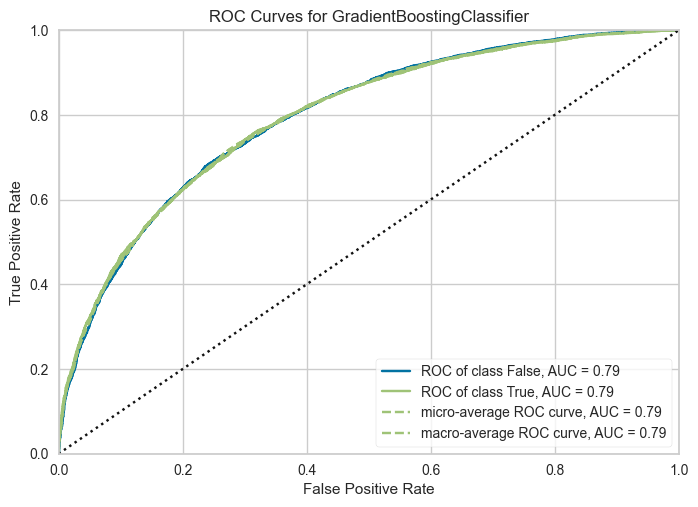

In [22]:
plot_model(tuned_gbc, plot = 'auc')

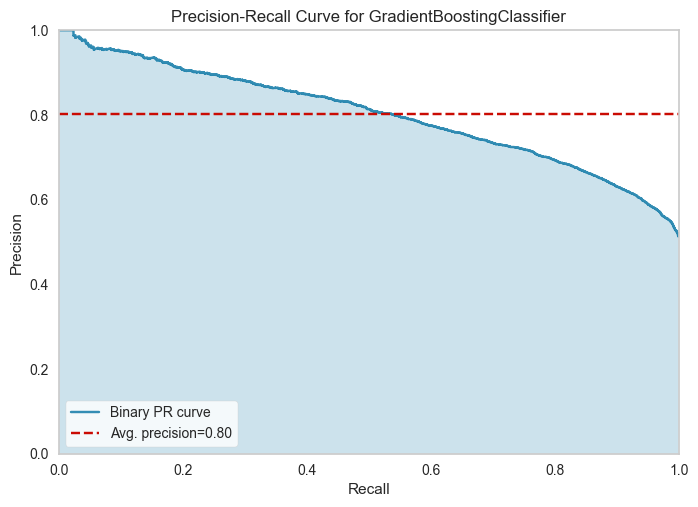

In [23]:
plot_model(tuned_gbc, plot = 'pr')

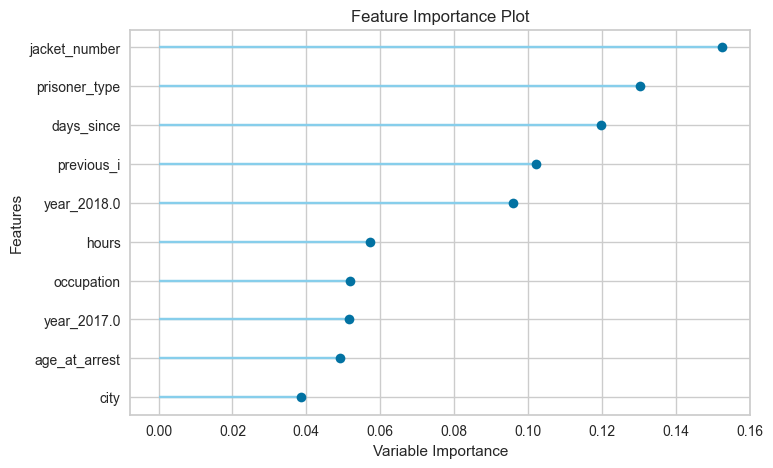

In [24]:
plot_model(tuned_gbc, plot='feature')

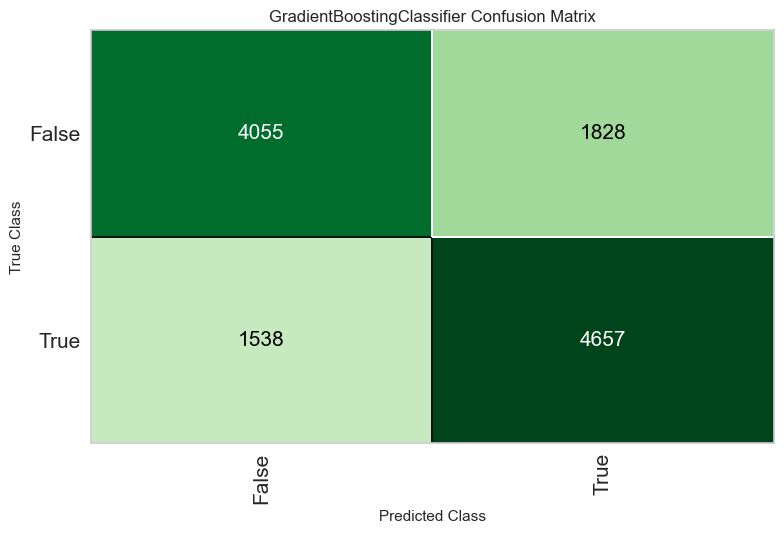

In [25]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [26]:
final_gbc = finalize_model(tuned_gbc)
print(final_gbc)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['jacket_number', 'age_at_arrest',
                                             'hours', 'days_since',
                                             'previous_i', 'age_first'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Trans...
                                            criterion='friedman_mse', init=None,
                  

In [27]:
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7421,0.8271,0.8002,0.7253,0.7609,0.4824,0.4852


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,...,school,prisoner_type,days_since,offense_level,previous_i,age_first,year,r,prediction_label,prediction_score
14726,966972,24.0,12,Single,Employed - Full Time,CHICAGO,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Arraignment,122.0,Felony,1,24.0,2013,True,1,0.7175
13212,878321,41.0,22,Single,Employed - Full Time,MAHOMET,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Arraignment,NaN,Felony,0,41.0,2012,False,1,0.5133
15656,975068,26.0,14,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,145.0,Misdemeanor,5,23.0,2016,True,1,0.8802
29272,1039737,22.0,90,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,219.0,Felony,8,17.0,2017,False,1,0.7237
3733,45393,36.0,1369,Single,Employed - Part Time,SAVOY,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Sentenced CCCC,52.0,Felony,5,35.0,2014,True,1,0.8336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33680,1054207,23.0,2,Single,Employed - Part Time,URBANA,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,205.0,Misdemeanor,4,20.0,2017,True,1,0.6236
8739,66710,28.0,195,Divorced,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Other,164.0,Felony,3,28.0,2013,True,1,0.8296
25337,1028351,17.0,20,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Arraignment,NaN,Felony,0,17.0,2012,True,1,0.8757
21783,1014356,47.0,19,Divorced,Employed - Full Time,SAVOY,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,166.0,Felony,1,47.0,2014,True,1,0.6329


In [28]:
save_model(gbc, model_name='gbc-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['jacket_number', 'age_at_arrest',
                                              'hours', 'days_since',
                                              'previous_i', 'age_first'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Trans...
                                             criterion='friedman_mse', init=None,
   

In [29]:
unseen_predictions = predict_model(final_gbc)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7421,0.8271,0.8002,0.7253,0.7609,0.4824,0.4852


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,...,school,prisoner_type,days_since,offense_level,previous_i,age_first,year,r,prediction_label,prediction_score
14726,966972,24.0,12,Single,Employed - Full Time,CHICAGO,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Arraignment,122.0,Felony,1,24.0,2013,True,1,0.7175
13212,878321,41.0,22,Single,Employed - Full Time,MAHOMET,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Arraignment,NaN,Felony,0,41.0,2012,False,1,0.5133
15656,975068,26.0,14,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,145.0,Misdemeanor,5,23.0,2016,True,1,0.8802
29272,1039737,22.0,90,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,219.0,Felony,8,17.0,2017,False,1,0.7237
3733,45393,36.0,1369,Single,Employed - Part Time,SAVOY,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Sentenced CCCC,52.0,Felony,5,35.0,2014,True,1,0.8336


In [30]:
unseen_predictions['prediction'] = unseen_predictions['prediction_label'].map({0: False, 1: True})

# Compare similarity between 'r' and 'prediction_mapped'
similarity = (unseen_predictions['r'] == unseen_predictions['prediction']).mean()

print("Similarity between 'r' and 'prediction_mapped':", similarity)

Similarity between 'r' and 'prediction_mapped': 0.742093061765193


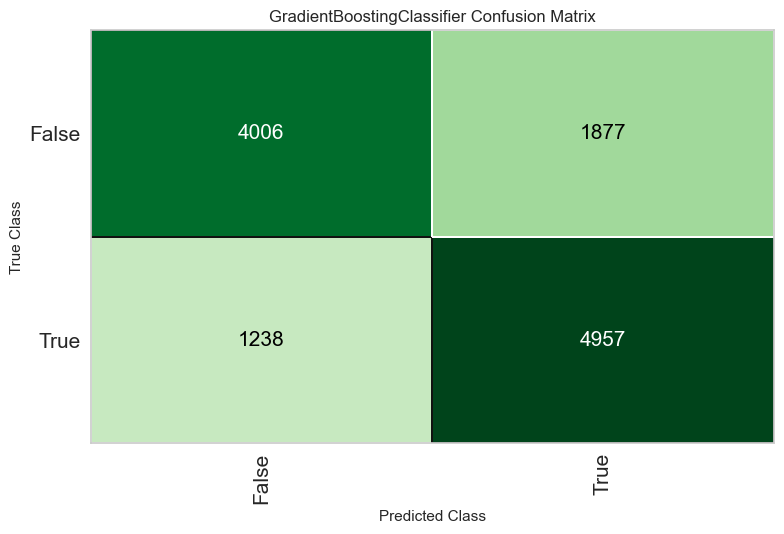

In [42]:
plot_model(final_gbc, plot='confusion_matrix')

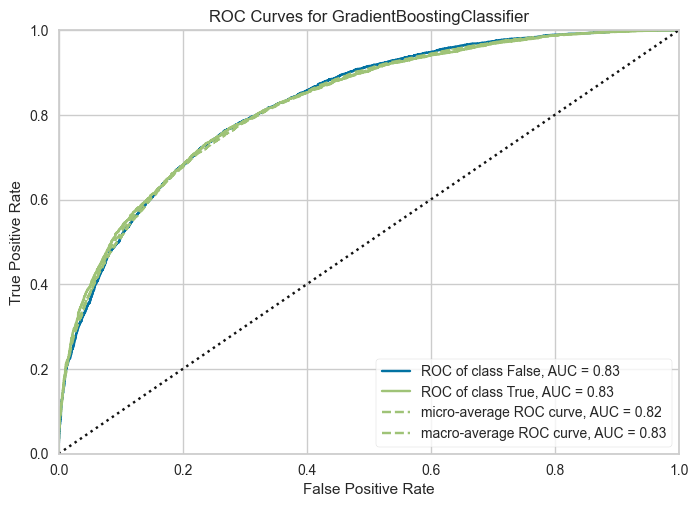

In [32]:
plot_model(final_gbc, plot='auc')

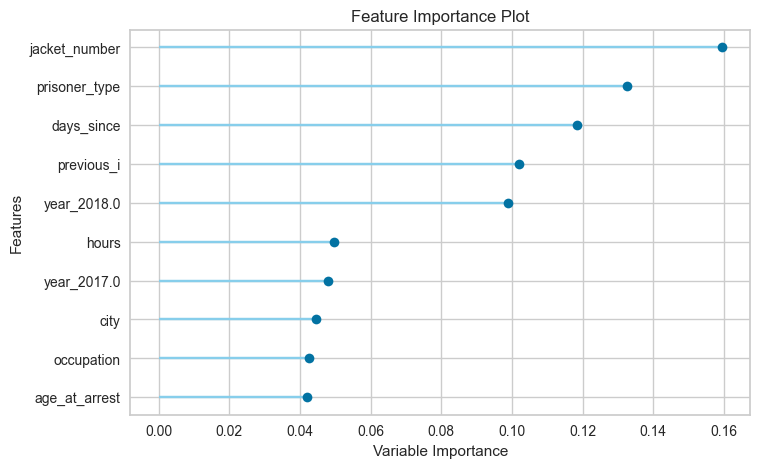

In [34]:
plot_model(final_gbc, plot='feature')

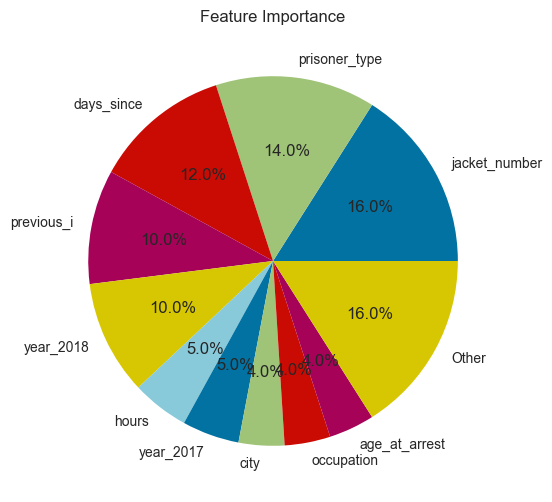

In [41]:
import matplotlib.pyplot as plt

data = {'Category': ['jacket_number', 'prisoner_type', 'days_since', 'previous_i', 'year_2018', 'hours', 'year_2017', 'city', 'occupation', 'age_at_arrest', 'Other'],
        'Values': [16, 14, 12, 10, 10, 5, 5, 4, 4, 4, 16]}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.pie(df['Values'], labels=df['Category'], autopct='%1.1f%%')
plt.title('Feature Importance')
plt.show()